In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from matplotlib.colors import LogNorm
import numpy as np

In [2]:
from analysis.beerdata_loader import BeerDataLoader

data_loader = BeerDataLoader(data_dir="../ada-2024-project-data-crusadas/data/BeerAdvocate", force_process=False)

ba_reviews_df, ba_ratings_df, ba_beers_df, ba_breweries_df, ba_users_df = data_loader.load_all_data()

print("Reviews DataFrame:")
print(ba_reviews_df.head())

print("\nRatings DataFrame:")
print(ba_ratings_df.head())

print("\nBeers DataFrame:")
print(ba_beers_df.head())

print("\nBreweries DataFrame:")
print(ba_breweries_df.head())

print("\nUsers DataFrame:")
print(ba_users_df.head())

Processed file '../ada-2024-project-data-crusadas/data/BeerAdvocate\reviews_processed.csv' already exists. Skipping processing.
Processed file '../ada-2024-project-data-crusadas/data/BeerAdvocate\ratings_processed.csv' already exists. Skipping processing.
Reviews DataFrame:
       beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date        user_name  \
0       37262   Euro Pale Lager  4.5  1440064800          nmann08   
1       10093  English Pale Ale  4.5  1235127600      StJamesGate   
2       10093  English Pale Ale  4.5  1142247600          mdagnew   
3       10093  E

In [3]:
print(ba_breweries_df)

          id                       location  \
0      39912                     Kyrgyzstan   
1      39913                     Kyrgyzstan   
2      39914                     Kyrgyzstan   
3      39915                     Kyrgyzstan   
4      39916                     Kyrgyzstan   
...      ...                            ...   
16753    128                        Germany   
16754   5023                          Aruba   
16755   1573        United States, New York   
16756  16186  United States, North Carolina   
16757   1138        United States, Maryland   

                                     name  nbr_beers  
0                  Abdysh-Ata (Абдыш Ата)          5  
1                             Arpa (АРПА)          1  
2                               Bear Beer          4  
3                             Blonder Pub          4  
4                            Kellers Bier          2  
...                                   ...        ...  
16753  Privatbrauerei Franz Joseph Sailer         

In [12]:
data_loader = BeerDataLoader(data_dir="../ada-2024-project-data-crusadas/data/RateBeer", force_process=False)

rb_reviews_df, rb_ratings_df, rb_beers_df, rb_breweries_df, rb_users_df = (
    data_loader.load_all_data()
)

print("Reviews DataFrame:")
print(rb_reviews_df.head())

print("\nRatings DataFrame:")
print(rb_ratings_df.head())

print("\nBeers DataFrame:")
print(rb_beers_df.head())

print("\nBreweries DataFrame:")
print(rb_breweries_df.head())

print("\nUsers DataFrame:")
print(rb_users_df.head())

Processing completed. Processed data saved to '../ada-2024-project-data-crusadas/data/RateBeer\reviews_processed.csv'.
Processing completed. Processed data saved to '../ada-2024-project-data-crusadas/data/RateBeer\ratings_processed.csv'.
Reviews DataFrame:
             beer_name  beer_id brewery_name  brewery_id       style  abv  \
0    33 Export (Gabon)   410549      Sobraga        3198  Pale Lager  5.0   
1  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
2  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
3  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
4  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   

         date     user_name  user_id  appearance  aroma  palate  taste  \
0  1461664800       Manslow   175852           2      4       2      4   
1  1487329200  MAGICuenca91   442761           2      3       2      4   
2  1466762400        Sibarh   288889           3      3   

In [8]:
print(ba_beers_df)

        beer_id           beer_name  brewery_id  \
0        166064    Nashe Moskovskoe       39912   
1        166065     Nashe Pivovskoe       39912   
2        166066  Nashe Shakhterskoe       39912   
3        166067  Nashe Zhigulevskoe       39912   
4        166063              Zhivoe       39912   
...         ...                 ...         ...   
280818    19139          Kölsch Ale         885   
280819    19140       Nut Brown Ale         885   
280820    19146         Octoberfest         885   
280821     2805          Scotch Ale         885   
280822    19148       Smoked Porter         885   

                               brewery_name                   style  \
0                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
1                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
2                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
3                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
4                    Abdysh-Ata 

**First question to ask: what is the ditribution of reviewers accross countries?**

             cleaned_location  nbr_ratings
137  United States of America      7303870
28                     Canada       274512
136            United Kingdom        41597
11                  Australia        34915
123                    Sweden        29914
90                Netherlands        22952
50                    Germany        17460
106                   Romania        16823
16                    Belgium        16478
107                    Russia        10521


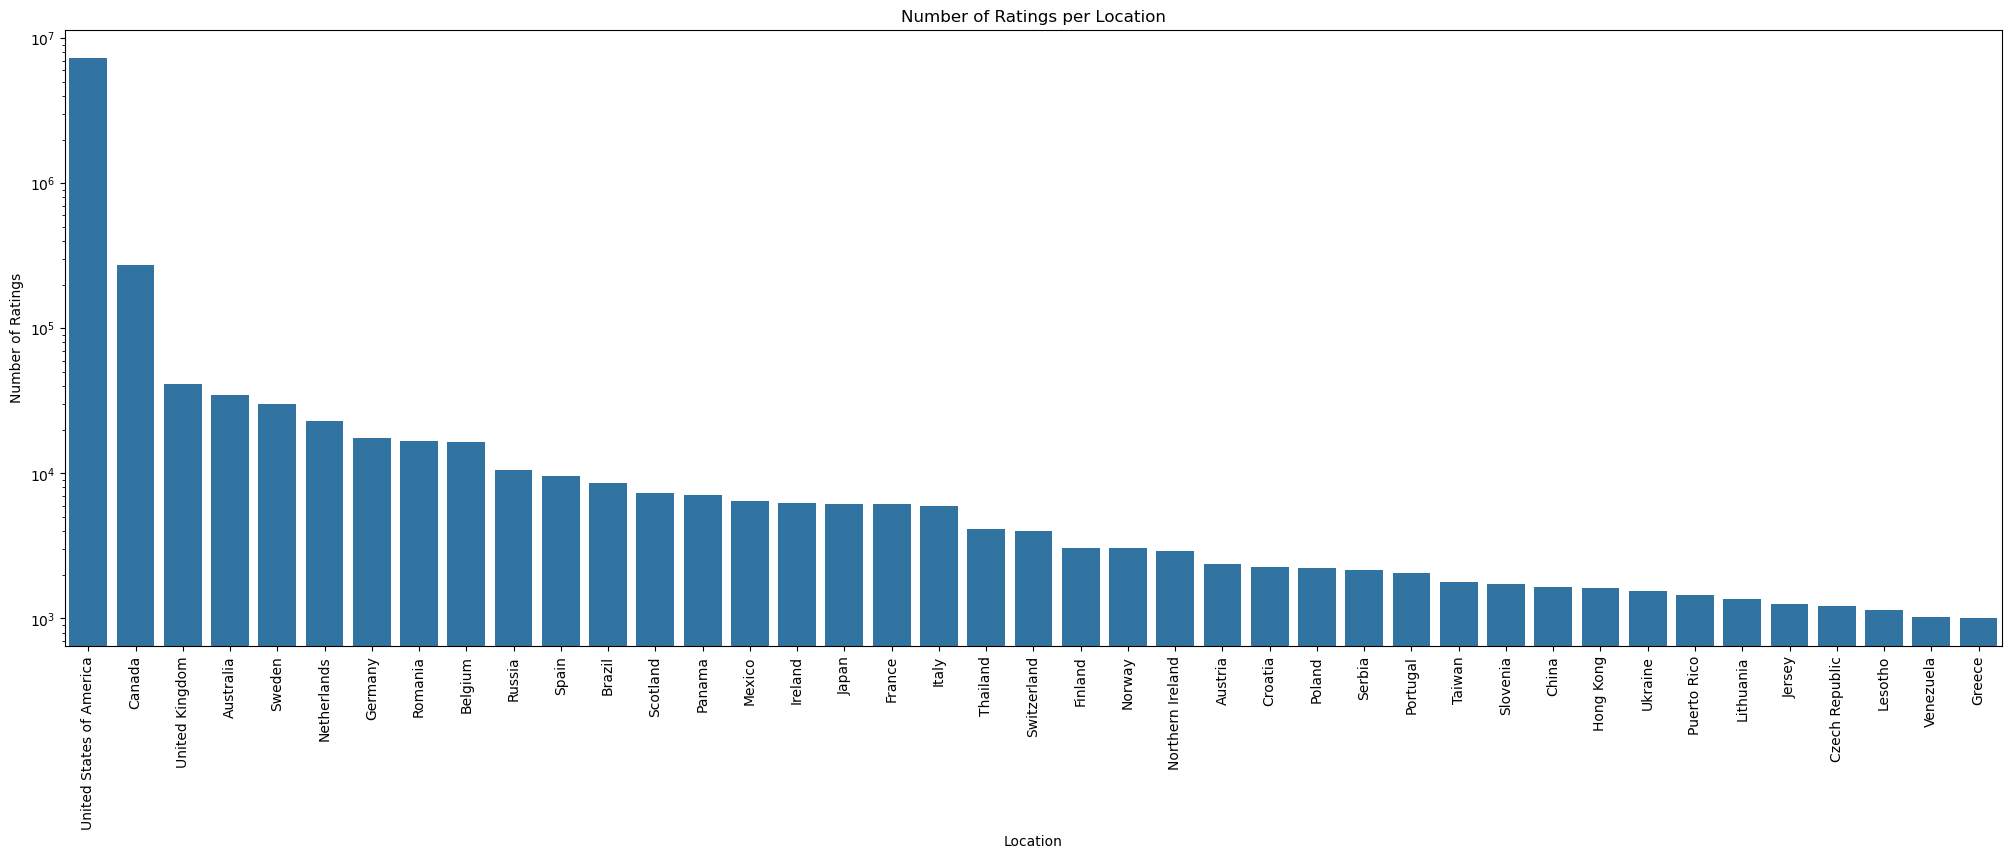

In [3]:
def clean_location(location):
    # Handle NaN values
    if isinstance(location, str):  # Check if location is a string
        country = location.split(',')[0].strip()
        # Replace "United States" with "United States of America"
        if country == "United States":
            return "United States of America"
        if country == "England":
            return "United Kingdom"
        return country
    return None

# Apply the cleanup function
ba_users_df['cleaned_location'] = ba_users_df['location'].apply(clean_location)
nbr_ratings_per_location = ba_users_df.groupby('cleaned_location')['nbr_ratings'].sum().reset_index()
nbr_ratings_per_location = nbr_ratings_per_location[nbr_ratings_per_location['nbr_ratings'] > 1000].sort_values(by='nbr_ratings', ascending=False)

print(nbr_ratings_per_location.head(10))
plt.figure(figsize=(25, 8))
sns.barplot(data=nbr_ratings_per_location, x='cleaned_location', y='nbr_ratings', log=True)
plt.title('Number of Ratings per Location')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)  # Rotate location names vertically
plt.show()

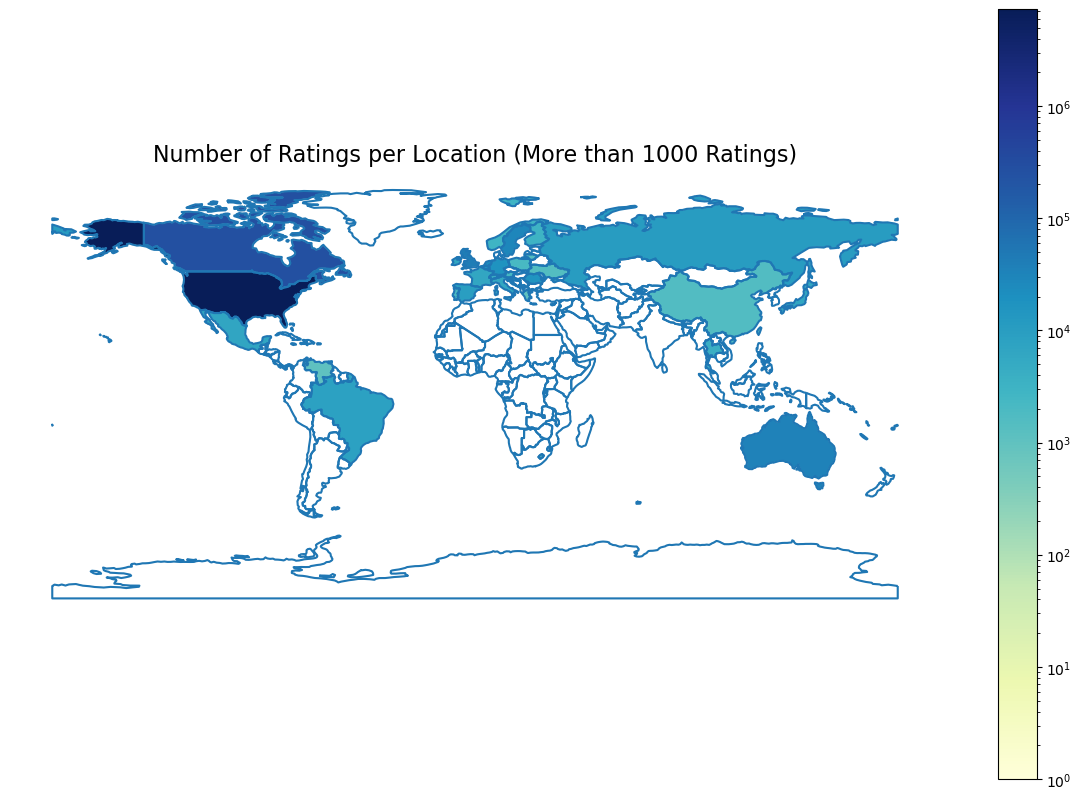

In [4]:
shapefile_path = r'C:\Users\Qrnqult\OneDrive\Documents\GitHub\ada-2024-project-data-crusadas\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Merge your ratings data with the world GeoDataFrame
merged = world.merge(nbr_ratings_per_location, how='left', left_on='SOVEREIGNT', right_on='cleaned_location')

# Fill NaN values in 'nbr_ratings' with 0 for visualization
merged['nbr_ratings'] = merged['nbr_ratings'].fillna(0)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax)  # Plot the world boundaries
merged.plot(column='nbr_ratings', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', 
            norm=LogNorm(vmin=1, vmax=merged['nbr_ratings'].max()), legend=True)

# Customizing the plot
ax.set_title('Number of Ratings per Location (More than 1000 Ratings)', fontsize=16)
ax.set_axis_off()  # Turn off the axis
plt.show()

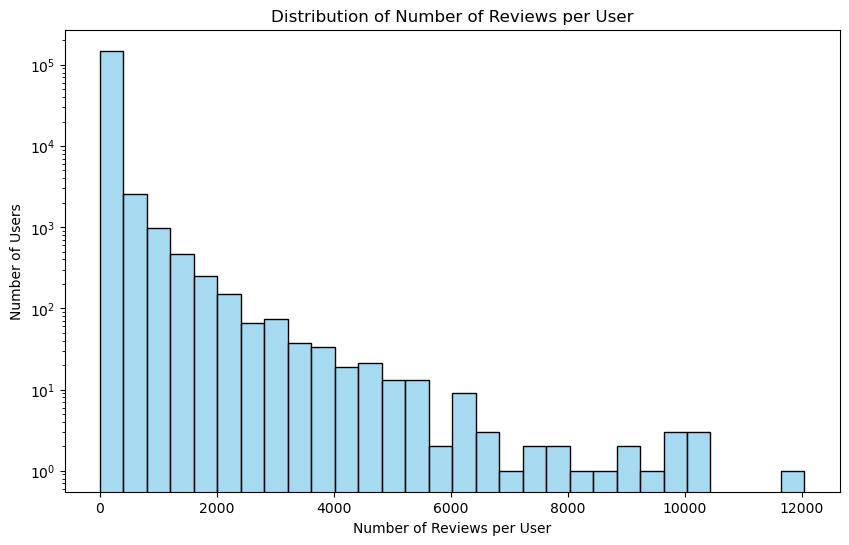

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(ba_users_df['nbr_ratings'], bins=30, kde=False, color="skyblue")  # Adjust bins as needed
plt.xlabel('Number of Reviews per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Reviews per User')
plt.yscale('log')  # Optional: Log scale for better visualization if skewed
plt.show()

**Most drinken beer per location and per year**

In [6]:
users_df_selected = ba_users_df[['user_id', 'location']]
ratings_df_selected = ba_ratings_df[['user_id', 'brewery_id', 'style', 'appearance', 'aroma', 'palate', 'rating', 'taste', 'date']]

# Merging on 'user_id'
merged_df = pd.merge(users_df_selected, ratings_df_selected, on='user_id', how='inner')

ba_breweries_df.rename(columns={'location': 'brewery_location'}, inplace=True)
ba_breweries_df.rename(columns={'id': 'brewery_id'}, inplace=True)

ba_breweries_selected = ba_breweries_df[['brewery_id', 'brewery_location']]

# Perform the merge on `beer_id`
final_merged_df = pd.merge(merged_df, ba_breweries_selected, on='brewery_id', how='inner')

In [7]:
print(final_merged_df)

                   user_id                   location  brewery_id  \
0           nmann08.184925  United States, Washington       37262   
1           nmann08.184925  United States, Washington       13092   
2           nmann08.184925  United States, Washington         323   
3           nmann08.184925  United States, Washington         323   
4           nmann08.184925  United States, Washington         323   
...                    ...                        ...         ...   
8393027     everman.532342  United States, California       23640   
8393028  justin0001.352175  United States, California       23640   
8393029    kyungsup.982216                        NaN       23640   
8393030      joetex.800347  United States, California       23640   
8393031  alexmatt86.313751  United States, California       23640   

                                       style  appearance  aroma  palate  \
0                            Euro Pale Lager        3.25   2.75    3.25   
1        Extra Specia

In [8]:
# Assuming final_merged_df is your DataFrame
# Get unique styles from the 'style' column
unique_styles = final_merged_df['style'].unique()

# Print the unique styles
print(unique_styles)

['Euro Pale Lager', 'Extra Special / Strong Bitter (ESB)', 'Old Ale', 'English Porter', 'English Strong Ale', ..., 'English Pale Mild Ale', 'Roggenbier', 'Faro', 'Euro Strong Lager', 'Kvass']
Length: 104
Categories (104, object): ['Altbier', 'American Amber / Red Ale', 'American Amber / Red Lager', 'American Barleywine', ..., 'Lambic - Unblended', 'Happoshu', 'Japanese Rice Lager', 'Faro']


In [9]:
macro_group = {
    'IPA': ['American IPA', 'English India Pale Ale (IPA)', 'Belgian IPA', 'American Double / Imperial IPA']
}

In [10]:
final_merged_df['datetime'] = pd.to_datetime(final_merged_df['date'], unit='s')

# Extract the year from the datetime
final_merged_df['year'] = final_merged_df['datetime'].dt.year

def categorize_macro_group(style):
    for key, styles in macro_group.items():
        if style in styles:
            return key
    return 'Other'

final_merged_df['macro_group'] = final_merged_df['style'].apply(categorize_macro_group)

In [11]:
print(final_merged_df)

                   user_id                   location  brewery_id  \
0           nmann08.184925  United States, Washington       37262   
1           nmann08.184925  United States, Washington       13092   
2           nmann08.184925  United States, Washington         323   
3           nmann08.184925  United States, Washington         323   
4           nmann08.184925  United States, Washington         323   
...                    ...                        ...         ...   
8393027     everman.532342  United States, California       23640   
8393028  justin0001.352175  United States, California       23640   
8393029    kyungsup.982216                        NaN       23640   
8393030      joetex.800347  United States, California       23640   
8393031  alexmatt86.313751  United States, California       23640   

                                       style  appearance  aroma  palate  \
0                            Euro Pale Lager        3.25   2.75    3.25   
1        Extra Specia

In [12]:
grouped = final_merged_df.groupby(['year', 'macro_group']).size().reset_index(name='count')

# Group by year to get total counts
total_count_per_year = final_merged_df.groupby('year').size().reset_index(name='total_count')

# Merge the counts with total counts
merged = pd.merge(grouped, total_count_per_year, on='year')

# Calculate the percentage
merged['percentage'] = (merged['count'] / merged['total_count']) * 100

# Filter to show only the macro group 'IPA'
result = merged[merged['macro_group'] == 'IPA'][['year', 'count', 'total_count', 'percentage']]

print(result)

    year   count  total_count  percentage
1   1998      10          134    7.462687
3   1999       6           83    7.228916
5   2000       9          110    8.181818
7   2001     128         1816    7.048458
9   2002    1291        20811    6.203450
11  2003    3922        50512    7.764492
13  2004    6146        62995    9.756330
15  2005    7936        79333   10.003403
17  2006   14252       116197   12.265377
19  2007   17352       128747   13.477596
21  2008   27043       194854   13.878596
23  2009   37902       233253   16.249309
25  2010   46022       270984   16.983291
27  2011   93404       524259   17.816385
29  2012  167917       888491   18.899122
31  2013  284377      1314109   21.640290
33  2014  442169      1883572   23.475025
35  2015  329802      1286137   25.642836
37  2016  261647       924219   28.310065
39  2017  133929       412415   32.474328


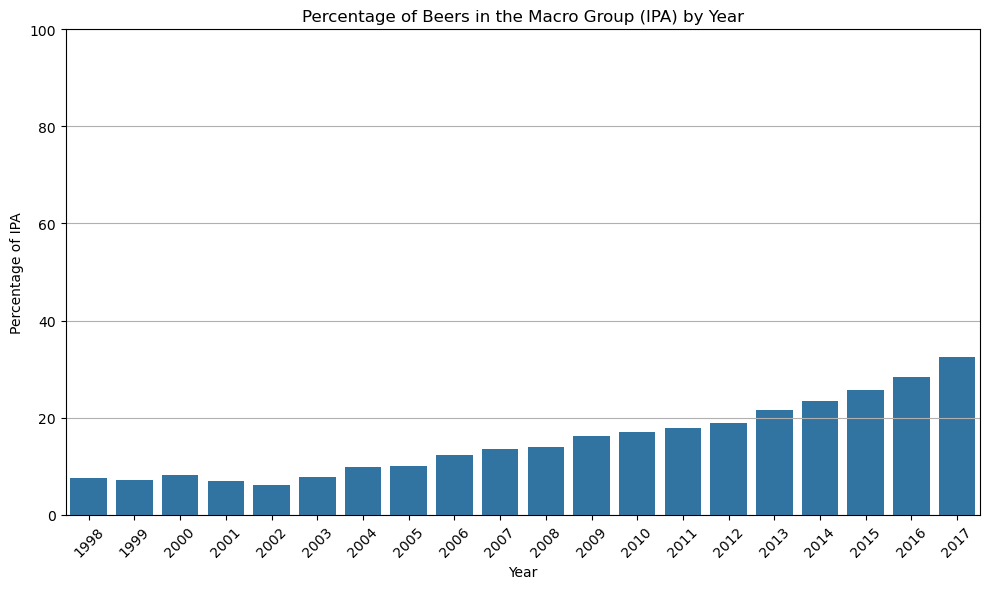

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='year', y='percentage')
plt.title('Percentage of Beers in the Macro Group (IPA) by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of IPA')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(axis='y')  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

**IPA in top 3**

In [14]:
final_merged_df_big_years = final_merged_df[final_merged_df['year'] >= 2006]

location_ratings = final_merged_df_big_years.groupby('location').count()

# Filter locations with more than 1000 ratings
locations_over_1000 = location_ratings[location_ratings['rating'] > 1000].index

# Filter the original DataFrame to include only these locations
filtered_df = final_merged_df_big_years[final_merged_df_big_years['location'].isin(locations_over_1000)]

beer_counts = filtered_df.groupby(['location', 'year', 'style']).size().reset_index(name='count')
print(beer_counts)

C:\Users\Qrnqult\AppData\Local\Temp\ipykernel_11268\2666961974.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  beer_counts = filtered_df.groupby(['location', 'year', 'style']).size().reset_index(name='count')


         location  year                            style  count
0       Australia  2006                          Altbier      0
1       Australia  2006         American Amber / Red Ale     16
2       Australia  2006       American Amber / Red Lager      3
3       Australia  2006              American Barleywine      1
4       Australia  2006               American Black Ale      0
...           ...   ...                              ...    ...
112315  Venezuela  2017  Bière de Champagne / Bière Brut      0
112316  Venezuela  2017               Lambic - Unblended      0
112317  Venezuela  2017                         Happoshu      0
112318  Venezuela  2017              Japanese Rice Lager      0
112319  Venezuela  2017                             Faro      0

[112320 rows x 4 columns]


In [15]:
beer_counts['rank'] = beer_counts.groupby(['location', 'year'])['count'].rank(method='first', ascending=False)

In [16]:
top_styles = beer_counts[beer_counts['rank'] <= 3]

# Sort the result for easier readability
top_styles = top_styles.sort_values(['location', 'year', 'rank'])

In [17]:
print(top_styles)

         location  year                           style  count  rank
37      Australia  2006                English Pale Ale     79   1.0
80      Australia  2006          American Adjunct Lager     67   2.0
43      Australia  2006                 Euro Pale Lager     36   3.0
184     Australia  2007          American Adjunct Lager    102   1.0
141     Australia  2007                English Pale Ale     84   2.0
...           ...   ...                             ...    ...   ...
112120  Venezuela  2016  American Double / Imperial IPA     46   2.0
112182  Venezuela  2016          Saison / Farmhouse Ale     38   3.0
112228  Venezuela  2017             American Pale Lager      3   1.0
112264  Venezuela  2017                 German Pilsener      3   2.0
112216  Venezuela  2017                         Altbier      0   3.0

[3240 rows x 5 columns]


In [18]:
top_styles['is_IPA'] = top_styles['style'].isin(macro_group['IPA'])

# For each year and location, check if there's an IPA style
ipa_presence = (
    top_styles.groupby(['location', 'year'])['is_IPA']
    .any()  # Check if there's any IPA style in each group  # Replace True/False with Yes/No
    .reset_index(name='IPA_Present')  # Reset index and name the column
)

In [19]:
print(ipa_presence)

       location  year  IPA_Present
0     Australia  2006        False
1     Australia  2007        False
2     Australia  2008        False
3     Australia  2009         True
4     Australia  2010         True
...         ...   ...          ...
1075  Venezuela  2013         True
1076  Venezuela  2014        False
1077  Venezuela  2015         True
1078  Venezuela  2016         True
1079  Venezuela  2017        False

[1080 rows x 3 columns]


In [20]:
total_countries = ipa_presence['location'].nunique()

print(total_countries)

# Filter for rows where IPA_Present is "Yes"
ipa_countries = ipa_presence[ipa_presence['IPA_Present'] == True]

# Group by year and count unique locations
ipa_presence_count = ipa_countries.groupby('year')['location'].nunique().reset_index(name='num_countries_with_IPA')

# Display the result
print(ipa_presence_count)

90
    year  num_countries_with_IPA
0   2006                      45
1   2007                      55
2   2008                      58
3   2009                      61
4   2010                      62
5   2011                      63
6   2012                      69
7   2013                      79
8   2014                      81
9   2015                      86
10  2016                      88
11  2017                      87


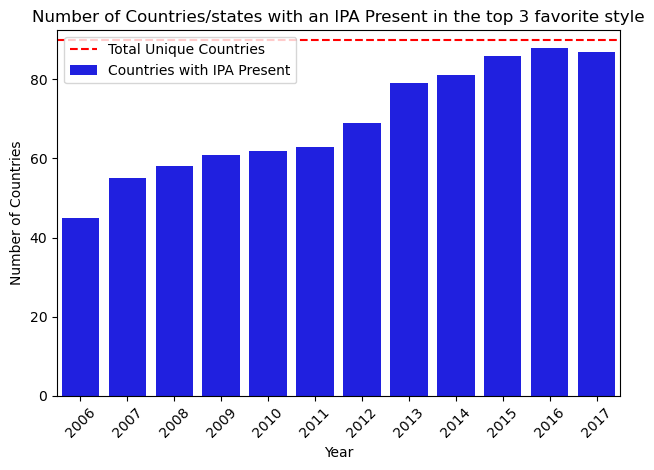

In [21]:
# Bar plot for the number of countries with IPA
sns.barplot(x='year', y='num_countries_with_IPA', data=ipa_presence_count, color='blue', label='Countries with IPA Present')

# Adding a line plot for total countries (this will be a constant line across years)
plt.axhline(y=total_countries, color='red', linestyle='--', label='Total Unique Countries')

# Customize the plot
plt.title('Number of Countries/states with an IPA Present in the top 3 favorite style')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

**How envolve the ratings over year?**

In [22]:
print(final_merged_df)

                   user_id                   location  brewery_id  \
0           nmann08.184925  United States, Washington       37262   
1           nmann08.184925  United States, Washington       13092   
2           nmann08.184925  United States, Washington         323   
3           nmann08.184925  United States, Washington         323   
4           nmann08.184925  United States, Washington         323   
...                    ...                        ...         ...   
8393027     everman.532342  United States, California       23640   
8393028  justin0001.352175  United States, California       23640   
8393029    kyungsup.982216                        NaN       23640   
8393030      joetex.800347  United States, California       23640   
8393031  alexmatt86.313751  United States, California       23640   

                                       style  appearance  aroma  palate  \
0                            Euro Pale Lager        3.25   2.75    3.25   
1        Extra Specia

In [23]:
final_merged_df_big_years = final_merged_df[final_merged_df['year'] >= 2006]
average_ratings = final_merged_df_big_years.groupby(['year', 'macro_group'])['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)
print(average_ratings)

    year macro_group  average_rating
0   2006         IPA        3.969142
1   2006       Other        3.706117
2   2007         IPA        3.951142
3   2007       Other        3.706739
4   2008         IPA        3.979654
5   2008       Other        3.750125
6   2009         IPA        3.982604
7   2009       Other        3.779624
8   2010         IPA        3.954476
9   2010       Other        3.794086
10  2011         IPA        4.054422
11  2011       Other        3.871025
12  2012         IPA        3.992117
13  2012       Other        3.754840
14  2013         IPA        4.007029
15  2013       Other        3.818573
16  2014         IPA        4.012347
17  2014       Other        3.841525
18  2015         IPA        4.048450
19  2015       Other        3.923160
20  2016         IPA        4.054918
21  2016       Other        3.932121
22  2017         IPA        4.072019
23  2017       Other        3.938672


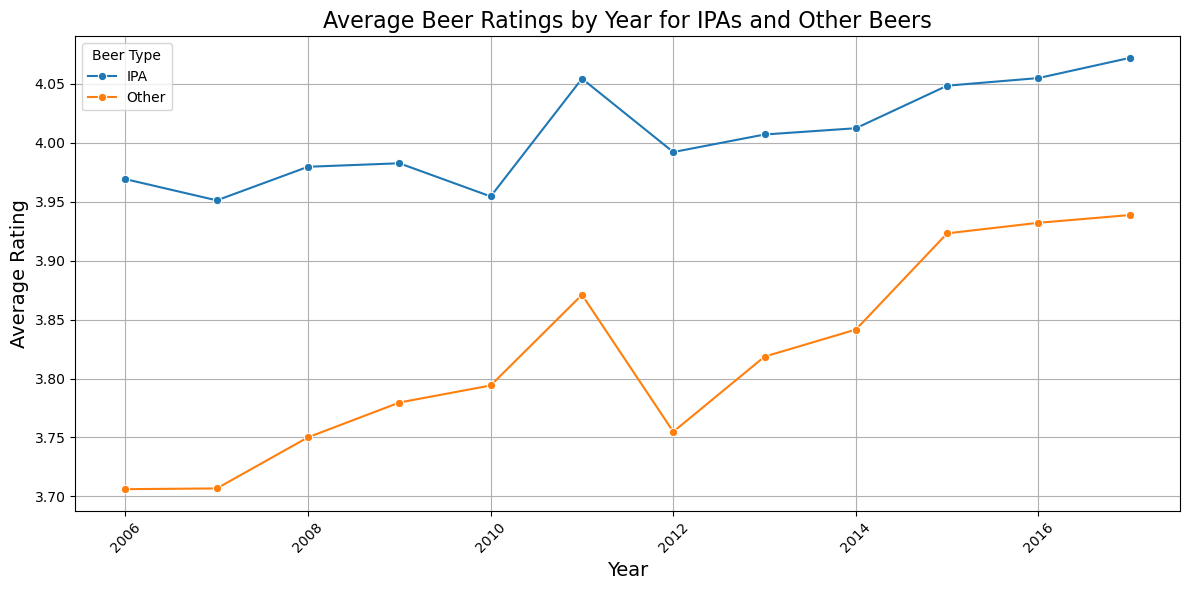

In [24]:

plt.figure(figsize=(12, 6))

# Create a line plot for average ratings
sns.lineplot(data=average_ratings, x='year', y='average_rating', hue='macro_group', marker='o')

# Customize the plot
plt.title('Average Beer Ratings by Year for IPAs and Other Beers', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Beer Type')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
location_ratings = final_merged_df_big_years.groupby('location').count()

# Filter locations with more than 1000 ratings
locations_over_1000 = location_ratings[location_ratings['rating'] > 5000].index

print(locations_over_1000)

# Filter the original DataFrame to include only these locations
filtered_df = final_merged_df_big_years[final_merged_df_big_years['location'].isin(locations_over_1000)]

average_ratings = filtered_df.groupby(['location', 'macro_group'])['rating'].mean().reset_index()

print(average_ratings)

Index(['Australia', 'Belgium', 'Brazil', 'Canada', 'England', 'France',
       'Germany', 'Ireland', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'Panama', 'Romania', 'Russia', 'Scotland', 'Spain', 'Sweden',
       'United States, Alabama', 'United States, Alaska',
       'United States, Arizona', 'United States, Arkansas',
       'United States, California', 'United States, Colorado',
       'United States, Connecticut', 'United States, Delaware',
       'United States, Florida', 'United States, Georgia',
       'United States, Hawaii', 'United States, Idaho',
       'United States, Illinois', 'United States, Indiana',
       'United States, Iowa', 'United States, Kansas',
       'United States, Kentucky', 'United States, Louisiana',
       'United States, Maine', 'United States, Maryland',
       'United States, Massachusetts', 'United States, Michigan',
       'United States, Minnesota', 'United States, Mississippi',
       'United States, Missouri', 'United States, Montana',
 

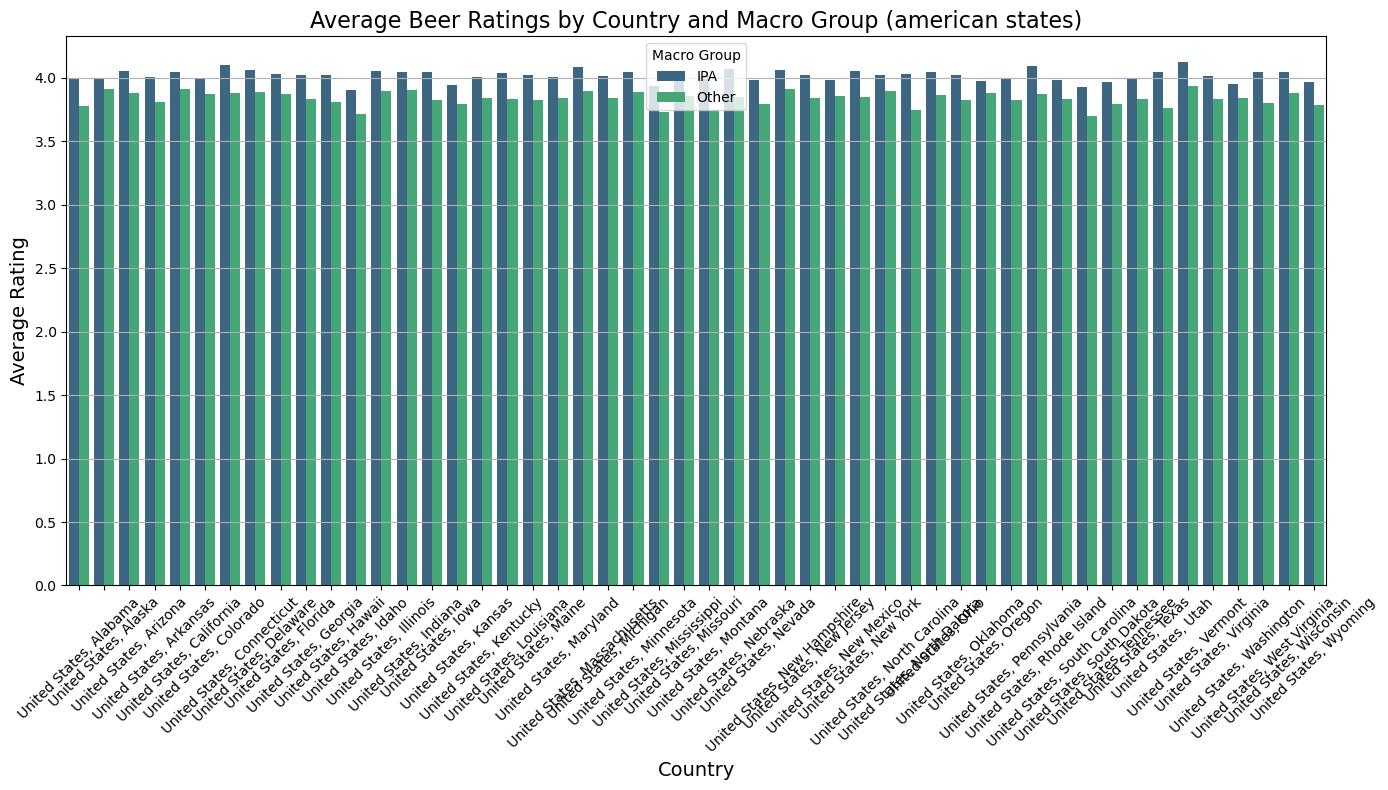

In [26]:
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

american_states = average_ratings[average_ratings['location'].str.startswith("United States")]
non_american_states = average_ratings[~average_ratings['location'].str.startswith("United States")]

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=american_states, x='location', y='average_rating', hue='macro_group', palette='viridis')

# Customize the plot
plt.title('Average Beer Ratings by Country and Macro Group (american states)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Macro Group')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

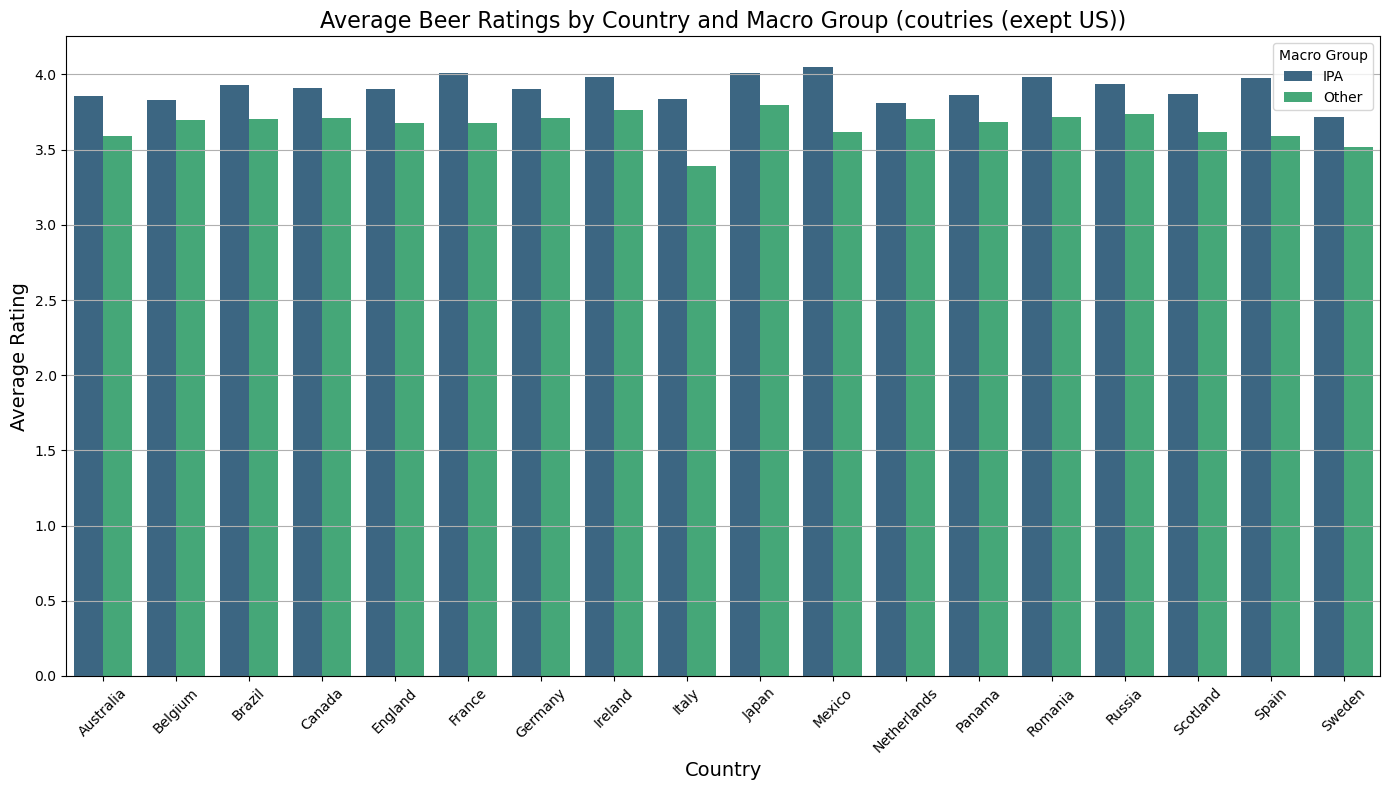

In [27]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=non_american_states, x='location', y='average_rating', hue='macro_group', palette='viridis')

# Customize the plot
plt.title('Average Beer Ratings by Country and Macro Group (coutries (exept US))', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Macro Group')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
user_rating_counts = final_merged_df.groupby('user_id')['rating'].count().reset_index()
user_rating_counts.columns = ['user_id', 'rating_count']  # Rename columns for clarity

In [29]:
print(user_rating_counts)

                       user_id  rating_count
0       -----kiki-----.1000245             2
1                   ---.940711             3
2             --dida--.1042029             3
3               --dom--.709199           165
4             --nomad--.931404             1
...                        ...           ...
153699      zzxasd43and.416381             1
153700       zzyskowski.807938             1
153701            zzyzx.174143             1
153702           zzz999.829367             1
153703         zzznumb.1062846             3

[153704 rows x 2 columns]


In [30]:
number_ratings = 500
users_above_2000 = user_rating_counts[user_rating_counts['rating_count'] > number_ratings]
users_below_2000 = user_rating_counts[user_rating_counts['rating_count'] <= number_ratings]

In [31]:
big_users = final_merged_df[final_merged_df['user_id'].isin(users_above_2000['user_id'])]
small_users = final_merged_df[final_merged_df['user_id'].isin(users_below_2000['user_id'])]

In [32]:
print(big_users.head())

          user_id                   location  brewery_id  \
0  nmann08.184925  United States, Washington       37262   
1  nmann08.184925  United States, Washington       13092   
2  nmann08.184925  United States, Washington         323   
3  nmann08.184925  United States, Washington         323   
4  nmann08.184925  United States, Washington         323   

                                 style  appearance  aroma  palate  rating  \
0                      Euro Pale Lager        3.25   2.75    3.25    2.88   
1  Extra Special / Strong Bitter (ESB)        4.00   3.50    3.75    3.56   
2                              Old Ale         NaN    NaN     NaN    4.50   
3                              Old Ale         NaN    NaN     NaN    3.75   
4                       English Porter        4.00   3.50    3.75    3.81   

   taste        date brewery_location            datetime  year macro_group  
0   2.75  1440064800            Gabon 2015-08-20 10:00:00  2015       Other  
1   3.50  1447498800

In [33]:
big_avg_ratings = big_users.groupby('macro_group')['rating'].mean().reset_index()
small_avg_ratings = small_users.groupby('macro_group')['rating'].mean().reset_index()
avg_ratings = pd.merge(big_avg_ratings, small_avg_ratings, on='macro_group', suffixes=('_big', '_small'))
avg_ratings.columns = ['beer_type', 'big_users', 'small_users']

In [34]:
print(avg_ratings)

  beer_type  big_users  small_users
0       IPA   3.951862     4.101602
1     Other   3.813592     3.876678


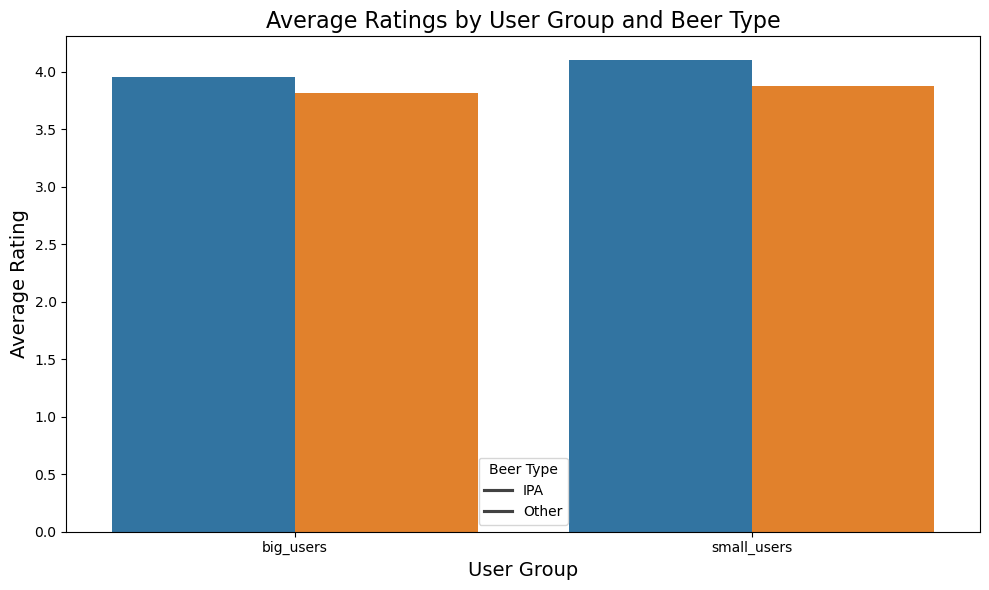

In [35]:
avg_ratings_melted = avg_ratings.melt(id_vars='beer_type', 
                                        value_vars=['big_users', 'small_users'],
                                        var_name='user_group', 
                                        value_name='average_rating')

# Create a bar plot with user groups on the x-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_ratings_melted, x='user_group', y='average_rating', hue='beer_type')

# Add titles and labels
plt.title('Average Ratings by User Group and Beer Type', fontsize=16)
plt.xlabel('User Group', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=0)  # No rotation needed for x-axis labels
plt.legend(title='Beer Type', labels=['IPA', 'Other'])
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show()

In [36]:
user_rating_counts = final_merged_df['user_id'].value_counts()

# Step 2: Define user categories
users_above_2000 = user_rating_counts[user_rating_counts > number_ratings]
users_below_2000 = user_rating_counts[user_rating_counts <= number_ratings]

# Step 3: Compute total number of users in each category
total_big_raters = len(users_above_2000)
total_small_raters = len(users_below_2000)

# Step 4: Create a summary DataFrame for better readability
user_categories = pd.DataFrame({
    'User Category': ['Big Raters', 'Small Raters'],
    'Total Users': [total_big_raters, total_small_raters]
})

print(user_categories)

  User Category  Total Users
0    Big Raters         3826
1  Small Raters       149878


**Let's analyse the sentiment of ratings**

In [241]:
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [242]:
nlp = spacy.load('en_core_web_sm')

In [243]:
analyzer = SentimentIntensityAnalyzer()

In [244]:
users_df_selected = ba_users_df[['user_id', 'location']]
ratings_df_selected = ba_reviews_df[['user_id', 'brewery_id', 'style', 'appearance', 'aroma', 'palate', 'rating', 'taste', 'date', 'text']]

# Merging on 'user_id'
merged_df = pd.merge(users_df_selected, ratings_df_selected, on='user_id', how='inner')

ba_breweries_df.rename(columns={'location': 'brewery_location'}, inplace=True)
ba_breweries_df.rename(columns={'id': 'brewery_id'}, inplace=True)

ba_breweries_selected = ba_breweries_df[['brewery_id', 'brewery_location']]

# Perform the merge on `beer_id`
final_merged_df = pd.merge(merged_df, ba_breweries_selected, on='brewery_id', how='inner')
print(final_merged_df['text'].count())

675842


In [245]:
macro_group = {
    'IPA': ['American IPA', 'English India Pale Ale (IPA)', 'Belgian IPA', 'American Double / Imperial IPA']
}

In [246]:
final_merged_df['datetime'] = pd.to_datetime(final_merged_df['date'], unit='s')

# Extract the year from the datetime
final_merged_df['year'] = final_merged_df['datetime'].dt.year

def categorize_macro_group(style):
    for key, styles in macro_group.items():
        if style in styles:
            return key
    return 'Other'

final_merged_df['macro_group'] = final_merged_df['style'].apply(categorize_macro_group)
final_merged_df = final_merged_df[final_merged_df['year'] >= 2006]

In [247]:
final_merged_subset_df = final_merged_df.sample(n=10000)
#final_merged_subset_df['doc'] = final_merged_subset_df['text'].apply(nlp)

In [ ]:
def classify_sentiment(doc):
    scores = []  # List to store polarity scores for sentences

    # Iterate through sentences in the document, extract text and analyze sentiment
    #for sent in doc.sents:
    #    sentiment_score = analyzer.polarity_scores(sent.text)['compound']
    #    scores.append(sentiment_score)

    # Aggregate sentiment scores (for example, averaging the scores)
    #average_score = np.mean(scores)

    average_score = analyzer.polarity_scores(doc)['compound']

    # Classify based on the average sentiment score
    positive = 1 if average_score >= 0.05 else 0
    negative = 1 if average_score <= -0.05 else 0
    neutral = 1 if np.abs(average_score) < 0.05 else 0
    return pd.Series([positive, negative, neutral])

# Ensure 'text' column exists
if 'text' in final_merged_df.columns:
    # Apply the sentiment classification function
    sentiment_results = final_merged_subset_df['text'].apply(classify_sentiment)
    sentiment_results.columns = ['positive', 'negative', 'neutral']
    print(sentiment_results)

In [238]:
result_df = pd.concat([final_merged_subset_df, sentiment_results], axis=1)

In [239]:
print(result_df)

                    user_id                       location  brewery_id  \
2621345  sjrodriguez.799897                            NaN      3452.0   
6568490     mklinger.300726  United States, North Carolina     23145.0   
7830784     brewlip6.497895        United States, Illinois       454.0   
2655722     swierczt.248032     United States, Connecticut        96.0   
8151431  jbrianlee88.859367  United States, North Carolina      1146.0   
...                     ...                            ...         ...   
108135                  NaN                            NaN         NaN   
354720                  NaN                            NaN         NaN   
426730                  NaN                            NaN         NaN   
237655                  NaN                            NaN         NaN   
51067                   NaN                            NaN         NaN   

                                       style  appearance  aroma  palate  \
2621345               Russian Imperi

In [240]:
summary = result_df.groupby(['year','macro_group']).agg(
        positive_count=('positive', 'sum'),
        negative_count=('negative', 'sum'),
        neutral_count=('neutral', 'sum')
    ).reset_index()

print(summary)

      year macro_group  positive_count  negative_count  neutral_count
0   2006.0         IPA             0.0             0.0            0.0
1   2006.0       Other             0.0             0.0            0.0
2   2007.0         IPA             0.0             0.0            0.0
3   2007.0       Other             0.0             0.0            0.0
4   2008.0         IPA             0.0             0.0            0.0
5   2008.0       Other             0.0             0.0            0.0
6   2009.0         IPA             0.0             0.0            0.0
7   2009.0       Other             1.0             0.0            0.0
8   2010.0         IPA             0.0             0.0            0.0
9   2010.0       Other             0.0             0.0            0.0
10  2011.0         IPA             1.0             0.0            0.0
11  2011.0       Other             2.0             0.0            0.0
12  2012.0         IPA             0.0             0.0            0.0
13  2012.0       Oth

In [211]:
# Calculate total count per group (year and Macro_group)
summary['total_count'] = summary['positive_count'] + summary['negative_count'] + summary['neutral_count']

# Calculate percentages
summary['positive_percentage'] = (summary['positive_count'] / summary['total_count']) * 100
summary['negative_percentage'] = (summary['negative_count'] / summary['total_count']) * 100
summary['neutral_percentage'] = (summary['neutral_count'] / summary['total_count']) * 100

In [212]:
print(summary)

    year macro_group  positive_count  negative_count  neutral_count  \
0   2006         IPA              37               1              2   
1   2006       Other             450              26             54   
2   2007         IPA              42               1              3   
3   2007       Other             478              26             57   
4   2008         IPA              72               4             12   
5   2008       Other             710              40             77   
6   2009         IPA             116               6              8   
7   2009       Other             782              31             99   
8   2010         IPA             146               8             15   
9   2010       Other             891              44             96   
10  2011         IPA             177               7             19   
11  2011       Other             977              46            148   
12  2012         IPA             135               8             10   
13  20

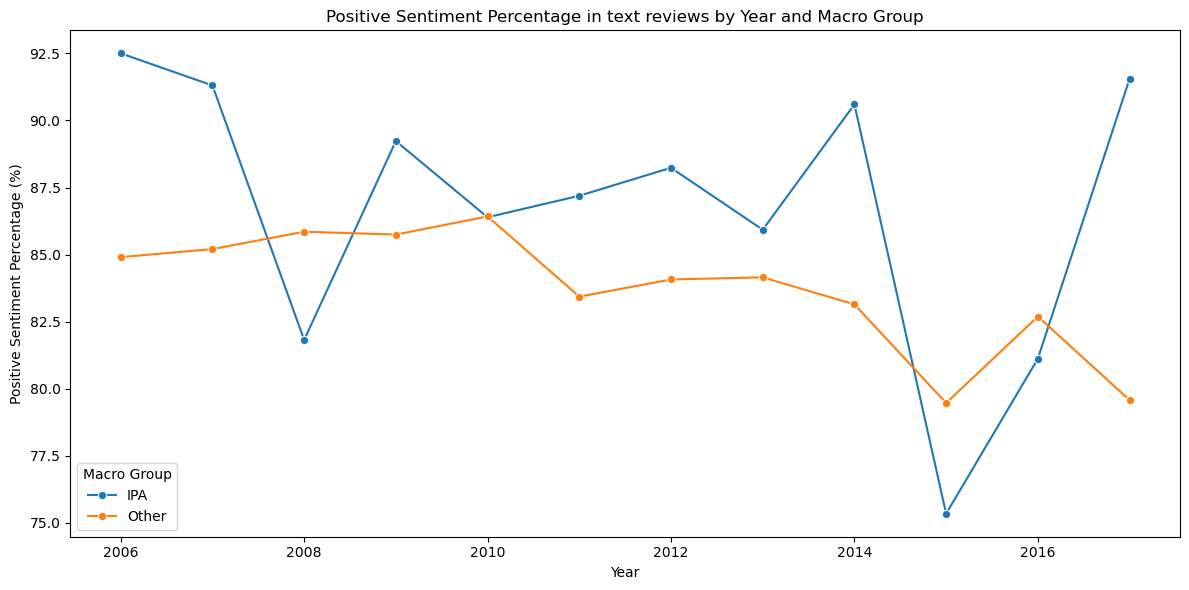

In [213]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Use seaborn to create a line plot
sns.lineplot(data=summary, x='year', y='positive_percentage', hue='macro_group', marker='o')

# Add title and labels
plt.title('Positive Sentiment Percentage in text reviews by Year and Macro Group')
plt.xlabel('Year')
plt.ylabel('Positive Sentiment Percentage (%)')
plt.legend(title='Macro Group')

# Show plot
plt.tight_layout()
plt.show()

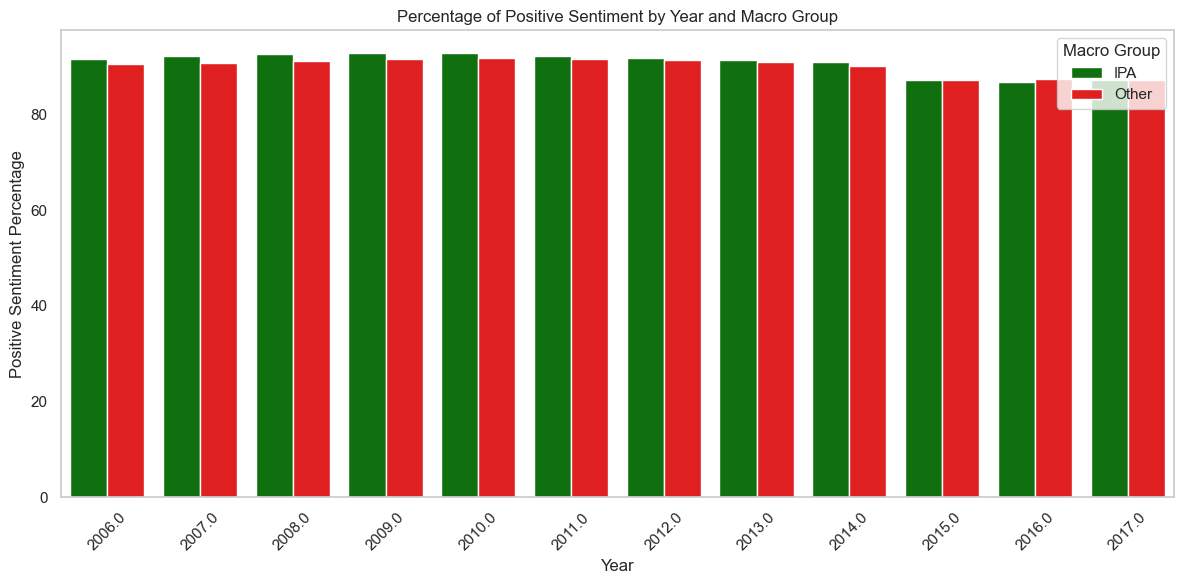

In [80]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='year', y='positive_percentage', hue='macro_group')

# Adding titles and labels
plt.title('Percentage of Positive Sentiment by Year and Macro Group')
plt.xlabel('Year')
plt.ylabel('Positive Sentiment Percentage')
plt.legend(title='Macro Group')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

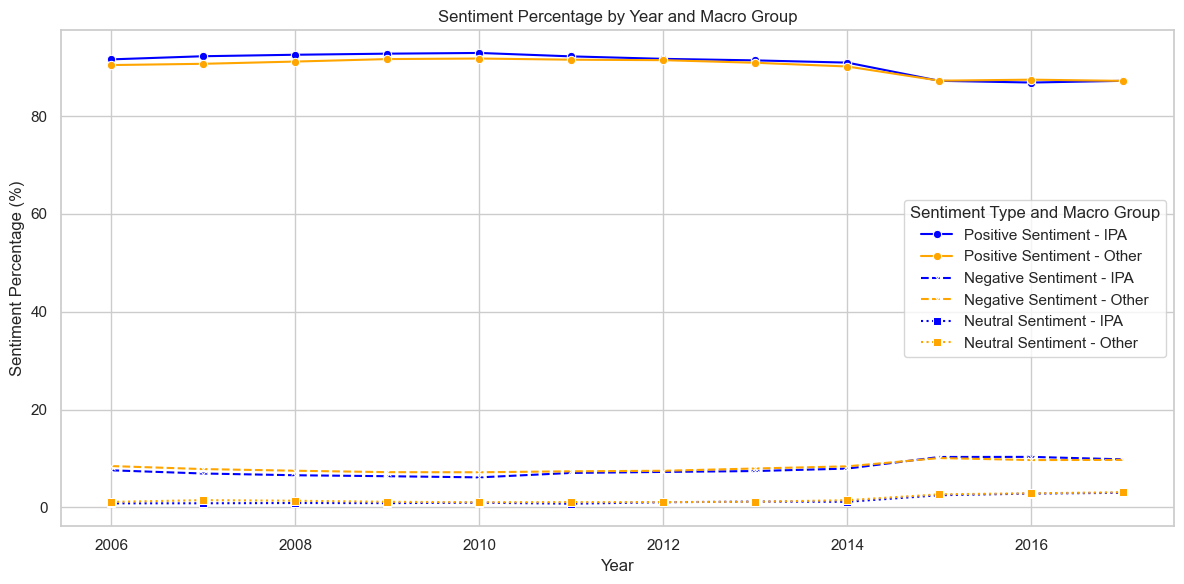

In [87]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Define colors for macro groups
colors = {'IPA': 'blue', 'Other': 'orange'}

# Plotting the positive percentage
for macro in summary['macro_group'].unique():
    subset = summary[summary['macro_group'] == macro]
    sns.lineplot(data=subset, x='year', y='positive_percentage', marker='o', 
                 color=colors[macro], label=f'Positive Sentiment - {macro}')

# Plotting the negative percentage
for macro in summary['macro_group'].unique():
    subset = summary[summary['macro_group'] == macro]
    sns.lineplot(data=subset, x='year', y='negative_percentage', marker='x', 
                 linestyle='--', color=colors[macro], label=f'Negative Sentiment - {macro}')

# Plotting the neutral percentage
for macro in summary['macro_group'].unique():
    subset = summary[summary['macro_group'] == macro]
    sns.lineplot(data=subset, x='year', y='neutral_percentage', marker='s', 
                 linestyle=':', color=colors[macro], label=f'Neutral Sentiment - {macro}')

# Add title and labels
plt.title('Sentiment Percentage by Year and Macro Group')
plt.xlabel('Year')
plt.ylabel('Sentiment Percentage (%)')
plt.legend(title='Sentiment Type and Macro Group')

# Show plot
plt.tight_layout()
plt.show()

In [20]:
users_df_selected = ba_users_df[['user_id', 'location']]
ratings_df_selected = ba_ratings_df[['user_id', 'brewery_id', 'style', 'appearance', 'aroma', 'palate', 'rating', 'taste', 'date']]

# Merging on 'user_id'
merged_df = pd.merge(users_df_selected, ratings_df_selected, on='user_id', how='inner')

ba_breweries_df.rename(columns={'location': 'brewery_location'}, inplace=True)
ba_breweries_df.rename(columns={'id': 'brewery_id'}, inplace=True)

ba_breweries_selected = ba_breweries_df[['brewery_id', 'brewery_location', 'nbr_beers']]

# Perform the merge on `beer_id`
final_merged_df = pd.merge(merged_df, ba_breweries_selected, on='brewery_id', how='inner')

final_merged_df['datetime'] = pd.to_datetime(final_merged_df['date'], unit='s')

# Extract the year from the datetime
final_merged_df['year'] = final_merged_df['datetime'].dt.year

final_merged_df_big_years = final_merged_df[final_merged_df['year'] >= 2006]

location_ratings = final_merged_df_big_years.groupby('location').count()

# Filter locations with more than 1000 ratings
locations_over_1000 = location_ratings[location_ratings['rating'] > 1000].index

# Filter the original DataFrame to include only these locations
filtered_df = final_merged_df_big_years[final_merged_df_big_years['location'].isin(locations_over_1000)]

print(filtered_df)

                   user_id                   location  brewery_id  \
0           nmann08.184925  United States, Washington       37262   
1           nmann08.184925  United States, Washington       13092   
2           nmann08.184925  United States, Washington         323   
3           nmann08.184925  United States, Washington         323   
4           nmann08.184925  United States, Washington         323   
...                    ...                        ...         ...   
8393026   eturchick.374415  United States, California       23640   
8393027     everman.532342  United States, California       23640   
8393028  justin0001.352175  United States, California       23640   
8393030      joetex.800347  United States, California       23640   
8393031  alexmatt86.313751  United States, California       23640   

                                       style  appearance  aroma  palate  \
0                            Euro Pale Lager        3.25   2.75    3.25   
1        Extra Specia

In [21]:
filtered_df_copy = filtered_df.copy()

filtered_df_copy['is_IPA'] = filtered_df_copy['style'].isin(macro_group['IPA'])

In [142]:
location_ipa_percentage = filtered_df_copy.groupby('location').agg(
    IPA_Percentage=('is_IPA', lambda x: (x.sum() / len(x)) * 100)
).reset_index()

# Display the result
print(location_ipa_percentage)
location_ipa_percentage_sorted = location_ipa_percentage.sort_values(by='IPA_Percentage', ascending=False)

                        location  IPA_Percentage
0                      Australia       14.990524
1                        Austria       26.466513
2                        Belgium       10.456041
3                         Brazil       17.004988
4                         Canada       18.201039
..                           ...             ...
85     United States, Washington       22.805723
86  United States, West Virginia       20.945804
87      United States, Wisconsin       20.274607
88        United States, Wyoming       19.020040
89                     Venezuela       17.221135

[90 rows x 2 columns]


In [167]:
american_states = location_ipa_percentage_sorted[location_ipa_percentage_sorted['location'].str.startswith("United States")]
print(american_states)
non_american_states = location_ipa_percentage_sorted[~location_ipa_percentage_sorted['location'].str.startswith("United States")]

                         location  IPA_Percentage
45     United States, Connecticut       31.037737
83         United States, Vermont       29.790604
59   United States, Massachusetts       27.069199
77    United States, Rhode Island       26.340437
46        United States, Delaware       26.278030
70        United States, New York       25.227201
67   United States, New Hampshire       24.582590
57           United States, Maine       24.423625
64         United States, Montana       24.389669
43      United States, California       24.261108
71  United States, North Carolina       24.033240
84        United States, Virginia       23.919374
76    United States, Pennsylvania       23.844386
82            United States, Utah       23.745486
73            United States, Ohio       23.739067
75          United States, Oregon       23.526455
49          United States, Hawaii       23.519093
68      United States, New Jersey       23.474483
58        United States, Maryland       23.419009


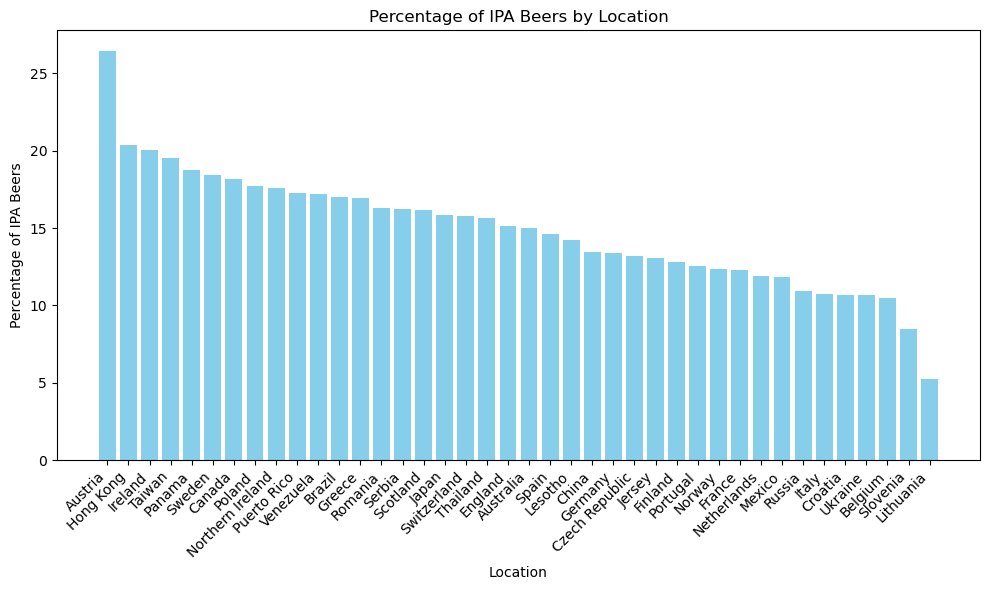

In [168]:
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(non_american_states['location'], non_american_states['IPA_Percentage'], color='skyblue')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Percentage of IPA Beers')
plt.title('Percentage of IPA Beers by Location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

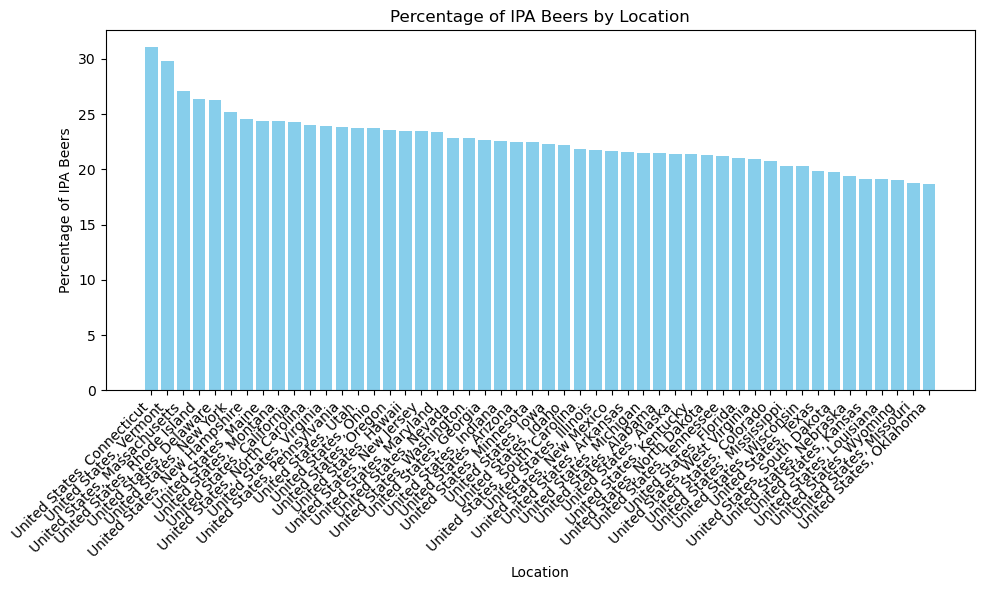

In [169]:
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(american_states['location'], american_states['IPA_Percentage'], color='skyblue')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Percentage of IPA Beers')
plt.title('Percentage of IPA Beers by Location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [170]:
def election_results_2020():
    results = {
        "Alabama": {"Democrat": 849624, "Republican": 1441170},
        "Alaska": {"Democrat": 153778, "Republican": 189951},
        "Arizona": {"Democrat": 1672143, "Republican": 1661686},
        "Arkansas": {"Democrat": 423932, "Republican": 760647},
        "California": {"Democrat": 11110250, "Republican": 6006429},
        "Colorado": {"Democrat": 1804352, "Republican": 1364607},
        "Connecticut": {"Democrat": 1080680, "Republican": 715291},
        "Delaware": {"Democrat": 296268, "Republican": 200603},
        "Florida": {"Democrat": 5297045, "Republican": 5668731},
        "Georgia": {"Democrat": 2473633, "Republican": 2461854},
        "Hawaii": {"Democrat": 366130, "Republican": 196864},
        "Idaho": {"Democrat": 287021, "Republican": 554119},
        "Illinois": {"Democrat": 3471915, "Republican": 2446891},
        "Indiana": {"Democrat": 1242416, "Republican": 1729519},
        "Iowa": {"Democrat": 759061, "Republican": 897672},
        "Kansas": {"Democrat": 570323, "Republican": 771406},
        "Kentucky": {"Democrat": 772474, "Republican": 1326646},
        "Louisiana": {"Democrat": 856034, "Republican": 1255776},
        "Maine": {"Democrat": 435072, "Republican": 360737},
        "Maryland": {"Democrat": 1985023, "Republican": 976414},
        "Massachusetts": {"Democrat": 2382202, "Republican": 1167202},
        "Michigan": {"Democrat": 2804040, "Republican": 2649852},
        "Minnesota": {"Democrat": 1717077, "Republican": 1484065},
        "Mississippi": {"Democrat": 539398, "Republican": 756764},
        "Missouri": {"Democrat": 1253014, "Republican": 1718736},
        "Montana": {"Democrat": 244786, "Republican": 343602},
        "Nebraska": {"Democrat": 566873, "Republican": 556846},
        "Nevada": {"Democrat": 703486, "Republican": 669890},
        "New Hampshire": {"Democrat": 424937, "Republican": 365654},
        "New Jersey": {"Democrat": 2608335, "Republican": 1883274},
        "New Mexico": {"Democrat": 501614, "Republican": 401894},
        "New York": {"Democrat": 5244886, "Republican": 3251997},
        "North Carolina": {"Democrat": 2684292, "Republican": 2758775},
        "North Dakota": {"Democrat": 114902, "Republican": 235595},
        "Ohio": {"Democrat": 2679165, "Republican": 3154834},
        "Oklahoma": {"Democrat": 503890, "Republican": 1020280},
        "Oregon": {"Democrat": 1340383, "Republican": 958448},
        "Pennsylvania": {"Democrat": 3458229, "Republican": 3377674},
        "Rhode Island": {"Democrat": 307486, "Republican": 199922},
        "South Carolina": {"Democrat": 1091541, "Republican": 1385103},
        "South Dakota": {"Democrat": 150471, "Republican": 261043},
        "Tennessee": {"Democrat": 1143711, "Republican": 1852475},
        "Texas": {"Democrat": 5259126, "Republican": 5890347},
        "Utah": {"Democrat": 560282, "Republican": 865140},
        "Vermont": {"Democrat": 242820, "Republican": 112704},
        "Virginia": {"Democrat": 2413568, "Republican": 1962430},
        "Washington": {"Democrat": 2369612, "Republican": 1584651},
        "West Virginia": {"Democrat": 235984, "Republican": 545382},
        "Wisconsin": {"Democrat": 1630866, "Republican": 1610184},
        "Wyoming": {"Democrat": 73491, "Republican": 193559}
    }
    
    return results

# Print the results for testing purposes
results = election_results_2020()

In [171]:
df_election = pd.DataFrame.from_dict(results, orient="index")

# Reset the index to have 'State' as a column
df_election.reset_index(inplace=True)
df_election.rename(columns={"index": "State"}, inplace=True)

In [172]:
df_election['Democrat_Percentage'] = (df_election['Democrat'] / (df_election['Democrat'] + df_election['Republican'])) * 100

In [173]:
print(df_election)

             State  Democrat  Republican  Democrat_Percentage
0          Alabama    849624     1441170            37.088625
1           Alaska    153778      189951            44.738151
2          Arizona   1672143     1661686            50.156832
3         Arkansas    423932      760647            35.787567
4       California  11110250     6006429            64.908911
5         Colorado   1804352     1364607            56.938319
6      Connecticut   1080680      715291            60.172464
7         Delaware    296268      200603            59.626744
8          Florida   5297045     5668731            48.305245
9          Georgia   2473633     2461854            50.119330
10          Hawaii    366130      196864            65.032665
11           Idaho    287021      554119            34.122857
12        Illinois   3471915     2446891            58.659044
13         Indiana   1242416     1729519            41.804952
14            Iowa    759061      897672            45.816737
15      

In [175]:
american_states_copy = american_states.copy()
american_states_copy['location'] = american_states_copy['location'].str.replace("United States, ", "", regex=False)

In [177]:
american_states_copy = american_states_copy.merge(df_election[['State', 'Democrat_Percentage']],
                                        left_on='location', right_on='State', how='left')

In [180]:
american_states_copy.drop(columns=['State'], inplace=True)
print(american_states_copy)

          location  IPA_Percentage  Democrat_Percentage
0      Connecticut       31.037737            60.172464
1          Vermont       29.790604            68.299187
2    Massachusetts       27.069199            67.115550
3     Rhode Island       26.340437            60.599360
4         Delaware       26.278030            59.626744
5         New York       25.227201            61.727177
6    New Hampshire       24.582590            53.749284
7            Maine       24.423625            54.670405
8          Montana       24.389669            41.602820
9       California       24.261108            64.908911
10  North Carolina       24.033240            49.315799
11        Virginia       23.919374            55.154687
12    Pennsylvania       23.844386            50.589205
13            Utah       23.745486            39.306395
14            Ohio       23.739067            45.923302
15          Oregon       23.526455            58.307157
16          Hawaii       23.519093            65

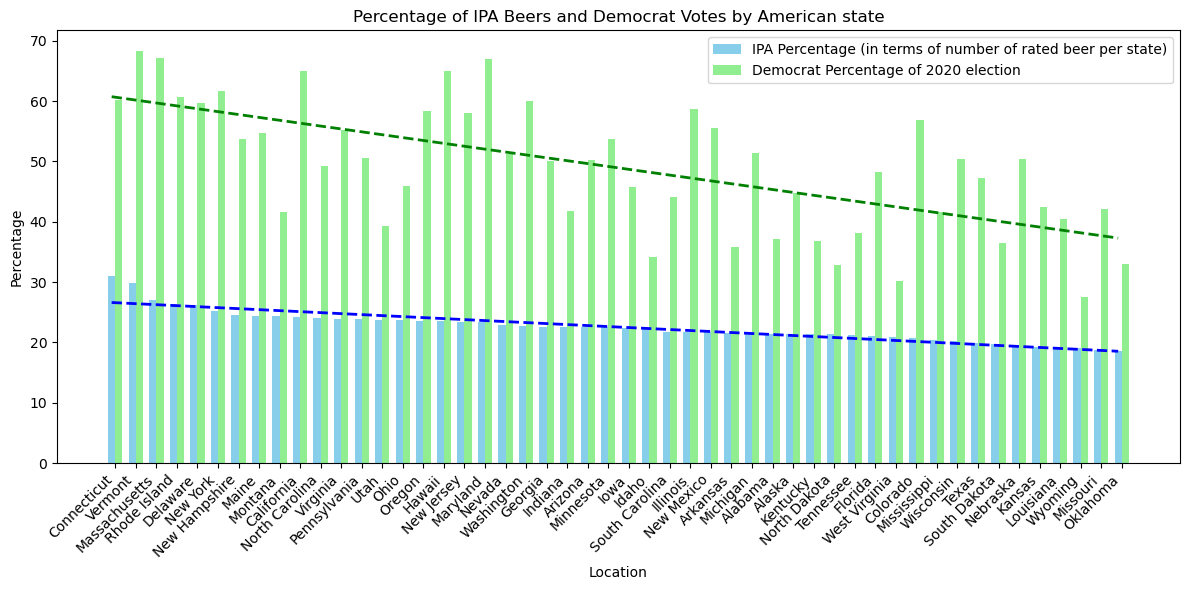

In [187]:
plt.figure(figsize=(12, 6))

# Define bar width and the number of states
bar_width = 0.35
index = np.arange(len(american_states_copy))

# Create the bars for IPA percentage and Democrat percentage
plt.bar(index, american_states_copy['IPA_Percentage'], bar_width, label='IPA Percentage (in terms of number of rated beer per state)', color='skyblue')
plt.bar(index + bar_width, american_states_copy['Democrat_Percentage'], bar_width, label='Democrat Percentage of 2020 election', color='lightgreen')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Percentage of IPA Beers and Democrat Votes by American state')

# Set the x-axis labels to the state names and rotate for readability
plt.xticks(index + bar_width / 2, american_states_copy['location'], rotation=45, ha='right')

# Add legend
plt.legend()

# Create the tendency line for Democrat percentages using linear regression
# Use np.polyfit to fit a linear line (degree 1)
slope, intercept = np.polyfit(index, american_states_copy['Democrat_Percentage'], 1)

# Generate the y-values for the trend line
trend_line = slope * index + intercept

# Plot the trend line
plt.plot(index, trend_line, label='Trend Line', color='green', linestyle='--', linewidth=2)

slope, intercept = np.polyfit(index, american_states_copy['IPA_Percentage'], 1)

# Generate the y-values for the trend line
trend_line = slope * index + intercept

# Plot the trend line
plt.plot(index, trend_line, label='Trend Line', color='blue', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [192]:
def state_population():
    population = {
        "Alabama": 5024279,
        "Alaska": 733391,
        "Arizona": 7151502,
        "Arkansas": 3017804,
        "California": 39538223,
        "Colorado": 5773714,
        "Connecticut": 3605944,
        "Delaware": 989948,
        "Florida": 21538187,
        "Georgia": 10711908,
        "Hawaii": 1455271,
        "Idaho": 1839106,
        "Illinois": 12812508,
        "Indiana": 6784821,
        "Iowa": 3190369,
        "Kansas": 2913314,
        "Kentucky": 4505836,
        "Louisiana": 4657757,
        "Maine": 1362359,
        "Maryland": 6177224,
        "Massachusetts": 7029917,
        "Michigan": 10077331,
        "Minnesota": 5706494,
        "Mississippi": 2961279,
        "Missouri": 6154913,
        "Montana": 1084225,
        "Nebraska": 1934408,
        "Nevada": 3104614,
        "New Hampshire": 1359711,
        "New Jersey": 9288994,
        "New Mexico": 2117522,
        "New York": 20201249,
        "North Carolina": 10439388,
        "North Dakota": 779094,
        "Ohio": 11799448,
        "Oklahoma": 3963516,
        "Oregon": 4237256,
        "Pennsylvania": 13002700,
        "Rhode Island": 1097379,
        "South Carolina": 5118425,
        "South Dakota": 886667,
        "Tennessee": 6910840,
        "Texas": 29145505,
        "Utah": 3271616,
        "Vermont": 643503,
        "Virginia": 8426307,
        "Washington": 7693612,
        "West Virginia": 1792147,
        "Wisconsin": 5893718,
        "Wyoming": 576851
    }
    return population

results = state_population()
df_population = pd.DataFrame.from_dict(results, orient="index")
df_population.reset_index(inplace=True)
df_population.rename(columns={"index": "State"}, inplace=True)
df_population.columns = ['State', 'Population'] 
print(df_population)

             State  Population
0          Alabama     5024279
1           Alaska      733391
2          Arizona     7151502
3         Arkansas     3017804
4       California    39538223
5         Colorado     5773714
6      Connecticut     3605944
7         Delaware      989948
8          Florida    21538187
9          Georgia    10711908
10          Hawaii     1455271
11           Idaho     1839106
12        Illinois    12812508
13         Indiana     6784821
14            Iowa     3190369
15          Kansas     2913314
16        Kentucky     4505836
17       Louisiana     4657757
18           Maine     1362359
19        Maryland     6177224
20   Massachusetts     7029917
21        Michigan    10077331
22       Minnesota     5706494
23     Mississippi     2961279
24        Missouri     6154913
25         Montana     1084225
26        Nebraska     1934408
27          Nevada     3104614
28   New Hampshire     1359711
29      New Jersey     9288994
30      New Mexico     2117522
31      

In [193]:
american_states_copy = american_states_copy.merge(df_population[['State', 'Population']],
                                        left_on='location', right_on='State', how='left')

In [194]:
american_states_copy.drop(columns=['State'], inplace=True)
print(american_states_copy)

          location  IPA_Percentage  Democrat_Percentage  Population
0      Connecticut       31.037737            60.172464     3605944
1          Vermont       29.790604            68.299187      643503
2    Massachusetts       27.069199            67.115550     7029917
3     Rhode Island       26.340437            60.599360     1097379
4         Delaware       26.278030            59.626744      989948
5         New York       25.227201            61.727177    20201249
6    New Hampshire       24.582590            53.749284     1359711
7            Maine       24.423625            54.670405     1362359
8          Montana       24.389669            41.602820     1084225
9       California       24.261108            64.908911    39538223
10  North Carolina       24.033240            49.315799    10439388
11        Virginia       23.919374            55.154687     8426307
12    Pennsylvania       23.844386            50.589205    13002700
13            Utah       23.745486            39

In [200]:
population_max = american_states_copy['Population'].max()
american_states_copy['scaled_Population'] = american_states_copy['Population'] / population_max * 100

Slope IPA percentage -0.1648020549021715
Slope population -0.1028647999623024


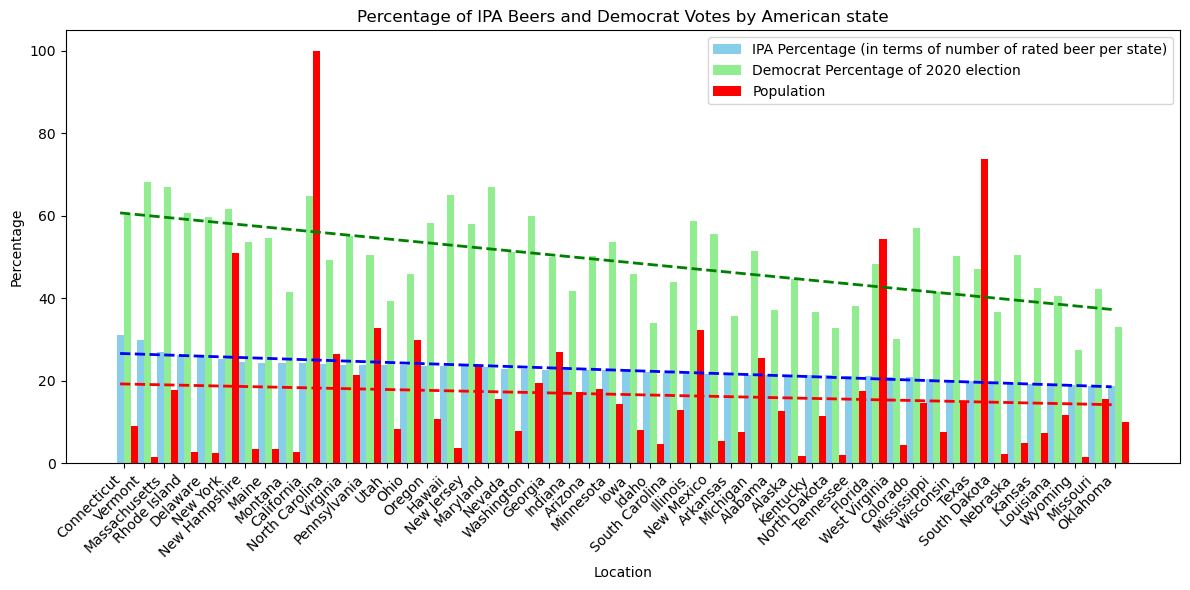

In [205]:
plt.figure(figsize=(12, 6))

# Define bar width and the number of states
bar_width = 0.35
index = np.arange(len(american_states_copy))

# Create the bars for IPA percentage and Democrat percentage
plt.bar(index, american_states_copy['IPA_Percentage'], bar_width, label='IPA Percentage (in terms of number of rated beer per state)', color='skyblue')
plt.bar(index + bar_width, american_states_copy['Democrat_Percentage'], bar_width, label='Democrat Percentage of 2020 election', color='lightgreen')
plt.bar(index + 2 * bar_width, american_states_copy['scaled_Population'], bar_width, label='Population', color='red')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Percentage of IPA Beers and Democrat Votes by American state')

# Set the x-axis labels to the state names and rotate for readability
plt.xticks(index + bar_width / 2, american_states_copy['location'], rotation=45, ha='right')

# Add legend
plt.legend()

# Create the tendency line for Democrat percentages using linear regression
# Use np.polyfit to fit a linear line (degree 1)
slope, intercept = np.polyfit(index, american_states_copy['Democrat_Percentage'], 1)

# Generate the y-values for the trend line
trend_line = slope * index + intercept

# Plot the trend line
plt.plot(index, trend_line, label='Trend Line', color='green', linestyle='--', linewidth=2)

slope, intercept = np.polyfit(index, american_states_copy['IPA_Percentage'], 1)

print("Slope IPA percentage", slope)

# Generate the y-values for the trend line
trend_line = slope * index + intercept

# Plot the trend line
plt.plot(index, trend_line, label='Trend Line', color='blue', linestyle='--', linewidth=2)

slope, intercept = np.polyfit(index, american_states_copy['scaled_Population'], 1)

print("Slope population", slope)

# Generate the y-values for the trend line
trend_line = slope * index + intercept

# Plot the trend line
plt.plot(index, trend_line, label='Trend Line', color='red', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [223]:
print(filtered_df_copy)

                   user_id                   location  brewery_id  \
0           nmann08.184925  United States, Washington       37262   
1           nmann08.184925  United States, Washington       13092   
2           nmann08.184925  United States, Washington         323   
3           nmann08.184925  United States, Washington         323   
4           nmann08.184925  United States, Washington         323   
...                    ...                        ...         ...   
8393026   eturchick.374415  United States, California       23640   
8393027     everman.532342  United States, California       23640   
8393028  justin0001.352175  United States, California       23640   
8393030      joetex.800347  United States, California       23640   
8393031  alexmatt86.313751  United States, California       23640   

                                       style  appearance  aroma  palate  \
0                            Euro Pale Lager        3.25   2.75    3.25   
1        Extra Specia

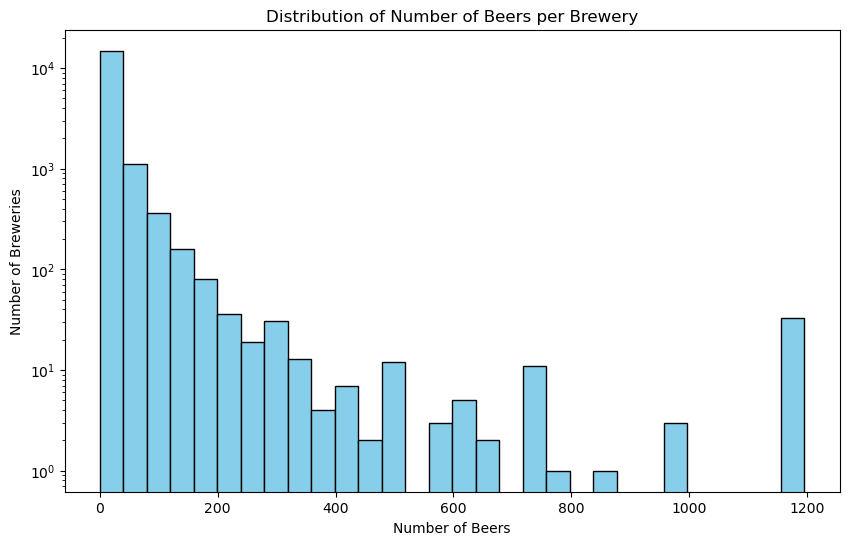

In [225]:
plt.figure(figsize=(10, 6))
plt.hist(ba_breweries_df['nbr_beers'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.title('Distribution of Number of Beers per Brewery')
plt.xlabel('Number of Beers')
plt.ylabel('Number of Breweries')
plt.show()

In [14]:
merged_df_brew = pd.merge(ba_beers_df, ba_breweries_df, left_on='brewery_id', right_on='brewery_id', how='left')

In [15]:
merged_df_brew['is_IPA'] = merged_df_brew['style'].isin(macro_group['IPA'])

In [16]:
print(merged_df_brew)

        beer_id           beer_name  brewery_id  \
0        166064    Nashe Moskovskoe       39912   
1        166065     Nashe Pivovskoe       39912   
2        166066  Nashe Shakhterskoe       39912   
3        166067  Nashe Zhigulevskoe       39912   
4        166063              Zhivoe       39912   
...         ...                 ...         ...   
280818    19139          Kölsch Ale         885   
280819    19140       Nut Brown Ale         885   
280820    19146         Octoberfest         885   
280821     2805          Scotch Ale         885   
280822    19148       Smoked Porter         885   

                               brewery_name                   style  \
0                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
1                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
2                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
3                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
4                    Abdysh-Ata 

In [25]:
average_beers_by_brewery = merged_df_brew.groupby(['is_IPA'])['nbr_beers'].mean().reset_index()
print(average_beers_by_brewery)

   is_IPA   nbr_beers
0   False   99.687014
1    True  112.922218


In [88]:
filtered_df_copy['big_brewery'] = filtered_df_copy['nbr_beers'] > 200
grouped_df = filtered_df_copy.groupby(['is_IPA', 'big_brewery']).size().reset_index(name='count')

In [89]:
print(grouped_df)

   is_IPA  big_brewery    count
0   False        False  3972852
1   False         True  1950964
2    True        False   957054
3    True         True   784965


In [90]:
ipa_count = grouped_df[(grouped_df['is_IPA'] == True) & (grouped_df['big_brewery'] == False)]['count'].values[0]
big_brewery_count = grouped_df[(grouped_df['is_IPA'] == True) & (grouped_df['big_brewery'] == True)]['count'].values[0]

# Performing the calculation
result = big_brewery_count / (ipa_count + big_brewery_count)*100

# Printing the result
print("Percentage big brewery for IPA = ", result)


Percentage big brewery for IPA =  45.06064514795763


In [91]:
non_ipa_count = grouped_df[(grouped_df['is_IPA'] == False) & (grouped_df['big_brewery'] == False)]['count'].values[0]
non_ipa_big_brewery_count = grouped_df[(grouped_df['is_IPA'] == False) & (grouped_df['big_brewery'] == True)]['count'].values[0]

# Performing the calculation
result = non_ipa_big_brewery_count / (non_ipa_count + non_ipa_big_brewery_count)*100

# Printing the result
print("Percentage big brewery for IPA = ", result)

Percentage big brewery for IPA =  32.93424373748273


In [92]:
grouped_df = filtered_df_copy.groupby(['year', 'is_IPA', 'big_brewery']).size().reset_index(name='count')

is_IPA      False      True 
year                        
2006    23.573854  41.248119
2007    23.385360  43.807435
2008    25.461598  44.325930
2009    28.429923  49.720472
2010    31.154487  46.803185
2011    34.856787  50.026726
2012    33.932801  52.466287
2013    35.342037  53.785706
2014    34.854879  48.672471
2015    32.634526  40.395705
2016    31.654049  35.669184
2017    29.916659  31.899883


<Figure size 1000x600 with 0 Axes>

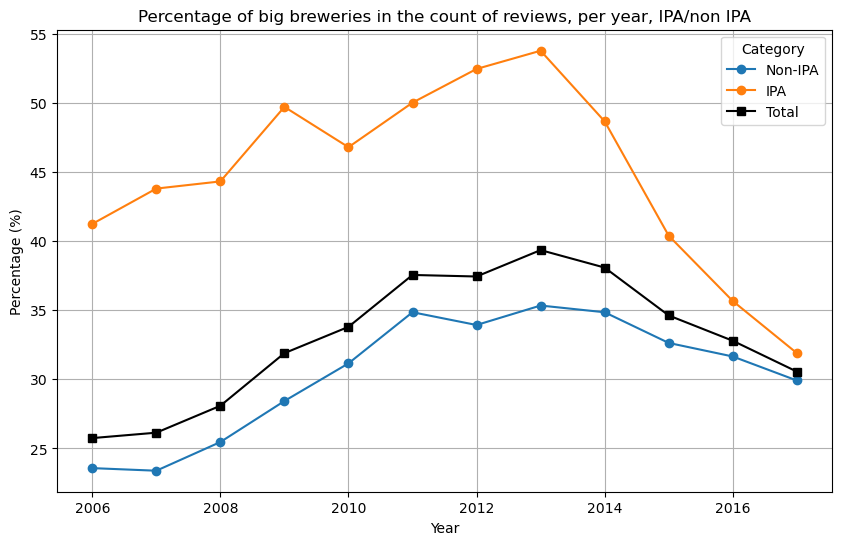

In [94]:
total_counts = grouped_df.groupby(['year', 'is_IPA'])['count'].sum().unstack()

# Calculate counts of IPA and non-IPA from big breweries
big_brewery_counts = grouped_df[grouped_df['big_brewery'] == True].groupby(['year', 'is_IPA'])['count'].sum().unstack()

# Calculate percentage of IPA and non-IPA from big breweries
percentage_big_brewery = big_brewery_counts.div(total_counts) * 100

print(percentage_big_brewery)

# Calculate the total beer counts from big breweries and total beer counts for each year
total_big_brewery_counts = grouped_df[grouped_df['big_brewery'] == True].groupby('year')['count'].sum()
total_all_counts = grouped_df.groupby('year')['count'].sum()

# Calculate the total percentage of all beer from big breweries
percentage_total_big_brewery = total_big_brewery_counts.div(total_all_counts) * 100

# Plotting
plt.figure(figsize=(10, 6))

# Plot the percentage of IPA, non-IPA, and total from big breweries
percentage_big_brewery.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.plot(percentage_total_big_brewery, marker='s', linestyle='-', color='black', label='Total Big Brewery')

# Adding labels and title
plt.title('Percentage of big breweries in the count of reviews, per year, IPA/non IPA')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Category', labels=['Non-IPA', 'IPA', 'Total'])

# Display the plot
plt.grid(True)
plt.show()